# Bayesian Inference: Activity 2
Prof.Valerio Marra

**Renan Alves de Oliveira**

*2019*

3. You are given 101 realizations of a 30-d random vector; be $d_{s}$ the s-th random vector with $s=1,...,101$. Equivalently, you are given a $30\times101$ matrix $d_{i,s}$. Compute the (sample) mean vector $d$ and covariance matrix $\Sigma$ using the first 100 realizations (for notational simplicity the hat is implied). Verify that $\Sigma$ is positive definite. Then build a $\chi^{2}$ function according to (2.69). The data be $\left\{ t_{i},x_{i}\right\} =\left\{ i,d_{i}\right\}$, and the theoretical model be $g\left(t|a,b\right)=at+b$:$$\chi^{2}\left(a,b\right)	=	\left[x_{i}-g\left(t_{i}|a,b\right)\right]\Sigma_{ij}^{-1}\left[x_{j}-g\left(t_{j}|a,b\right)\right].$$ Minimize $\chi^{2}\left(a,b\right)$ so as to find the best-fit values $\left\{ a,b\right\} ^{\mathrm{bf}}$. Plot $g\left(x|\left\{ a,b\right\} ^{\mathrm{bf}}\right)$ together with $\left\{ t_{i},x_{i}\right\}$ and also plot the correlation matrix–as in Figure 2.9. Repeat the analysis using only the diagonal part of the covariance matrix when building the $\chi^{2}$, that is, neglecting correlations. This should give you an idea of the bias on the results one gets when neglecting correlations (perhaps because unknown).

In [1]:
# Load some packages:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data:
data = np.loadtxt('data.txt')

In [2]:
data.shape

(101, 30)

Lets evaluate the s-th mean for all simulations, and it corresponding covariance matrix:

In [3]:
mean_d = np.mean(data[:-1], axis=0) # [:-1] cut the last element of this array.
cov_d = np.cov(data[:-1],rowvar=False)

To certify that the covariance matrix `cov_d`is positive definite, we can find all the eigenvalues of the matrix and if all elements are > 0, than is a signal that the matrix is positive definite. Another property is evaluating its Cholesky decomposition:

In [4]:
eigen_d = np.linalg.eigvals(cov_d)

Is there any eigenvalye < 0 in `eigen_d`?

In [5]:
np.unique(eigen_d<0)[0] # np.unique sets unique values.

False

In [6]:
try:
    np.linalg.cholesky(cov_d)
    print("Cholesky Decomposition done! Covariance matrix is positive definite!")
except:
    print('This matrix is not positive definite!')

Cholesky Decomposition done! Covariance matrix is positive definite!


In [7]:
inv_cov_d = np.linalg.inv(cov_d) # Evaluate its inverse

In [8]:
# Is this the real inverse of covariance matrix? If this == True, then yes!
np.unique(np.abs(np.round(np.dot(inv_cov_d, cov_d))) == np.diag(np.ones(30)))[0]

True

In this first part, I will minimize $\chi^{2}$ analitically. This procedure might not work in several other models.
$$\begin{eqnarray*}
\chi^{2}\left(a,b\right) & = & \left(\mathbf{x}-a\mathbf{t}-b\boldsymbol{1}\right)^{T}\boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-a\mathbf{t}-b\boldsymbol{1}\right),\\
 & = & \left(\mathbf{x}^{T}-a\mathbf{t}^{T}-b\boldsymbol{1}^{T}\right)\boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-a\mathbf{t}-b\boldsymbol{1}\right),\\
 & = & \mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}-a\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}-b\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}\\
 &  & -a\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}+a^{2}\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+ab\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}\\
 &  & -b\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}+ab\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+b^{2}\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1},\\
 & = & -a\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)+a^{2}\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\\
 &  & -b\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)+b^{2}\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}\\
 &  & +ab\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)\\
 &  & +\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x},\\
\frac{\partial\chi^{2}}{\partial a} & = & -\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)+2a\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+b\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right),\\
\frac{\partial\chi^{2}}{\partial b} & = & -\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)+2b\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+a\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right).
\end{eqnarray*}$$
Solving this linear system, we have:
$$\frac{\partial\chi^{2}}{\partial a}=\frac{\partial\chi^{2}}{\partial b}=0,$$
$$\begin{eqnarray*}
a & = & -\frac{-\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)+2\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)\left(\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}\right)}{\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)^{2}-4\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)\left(\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}\right)},\\
 & = & -\frac{2\alpha\lambda-\gamma\kappa}{\gamma^{2}-4\beta\lambda},\\
b & = & -\frac{-\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}+\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)+2\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)\left(\mathbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}\right)}{\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}+\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)^{2}-4\left(\mathbf{t}^{T}\boldsymbol{\Sigma}^{-1}\mathbf{t}\right)\left(\boldsymbol{1}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{1}\right)},\\
 & = & -\frac{2\beta\kappa-\alpha\gamma}{\gamma^{2}-4\beta\lambda}.
\end{eqnarray*}$$

In [9]:
# Creating t values for a line:
t_ = np.arange(1,30+1,1)

# Finally, let's define a and b in terms of matrices, which are implemented easily numerically:
# Note that the 101 simulation is given by data[-1]!
alpha = np.dot(data[-1], np.dot(inv_cov_d, t_)) + np.dot(t_, np.dot(inv_cov_d, data[-1]))
beta = np.dot(t_, np.dot(inv_cov_d, t_))
gamma = np.dot(t_, np.dot(inv_cov_d, np.ones(30))) + np.dot(np.ones(30), np.dot(inv_cov_d, t_))
lambda_ = np.dot(np.ones(30), np.dot(inv_cov_d, np.ones(30)))
kappa = np.dot(data[-1], np.dot(inv_cov_d, np.ones(30))) + np.dot(np.ones(30), np.dot(inv_cov_d, data[-1]))

Before we plot the function $g\left(t|a,b\right)=at+b$ and the correlation matrix, let's evaluate the same results, but using a diagonal covariance matrix:

In [10]:
diag_cov_d = np.diag(np.diag(cov_d))
inv_diag_cov_d = np.linalg.inv(diag_cov_d)

Ant the other parameters:

In [11]:
alpha_ = np.dot(data[-1], np.dot(inv_diag_cov_d, t_)) + np.dot(t_, np.dot(inv_diag_cov_d, data[-1]))
beta_ = np.dot(t_, np.dot(inv_diag_cov_d, t_))
gamma_ = np.dot(t_, np.dot(inv_diag_cov_d, np.ones(30))) + np.dot(np.ones(30), np.dot(inv_diag_cov_d, t_))
lambda__ = np.dot(np.ones(30), np.dot(inv_diag_cov_d, np.ones(30)))
kappa_ = np.dot(data[-1], np.dot(inv_diag_cov_d, np.ones(30))) + np.dot(np.ones(30), np.dot(inv_diag_cov_d, data[-1]))

In [12]:
a = -(2*alpha*lambda_ - gamma*kappa)/(gamma**2 - 4*beta*lambda_)
b = -(2*beta*kappa - alpha*gamma)/(gamma**2 - 4*beta*lambda_)

a_ = -(2*alpha_*lambda__ - gamma_*kappa_)/(gamma_**2 - 4*beta_*lambda__)
b_ = -(2*beta_*kappa_ - alpha_*gamma_)/(gamma_**2 - 4*beta_*lambda__)

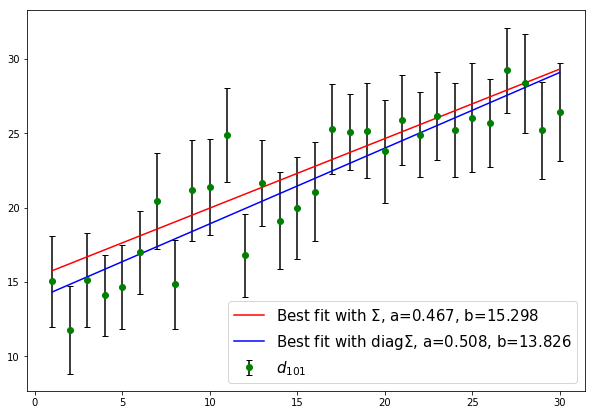

In [13]:
plt.figure(figsize=(10,7))
plt.errorbar(t_, data[-1], np.sqrt(np.diag(cov_d)), fmt='og', label=r'$d_{101}$', ecolor='k', capsize=3)
plt.plot(t_, a*t_+b, '-r', label=r'Best fit with $\Sigma$, a={}, b={}'.format(np.around(a, 3),np.around(b, 3)))
plt.plot(t_, a_*t_+b_, '-b', label=r'Best fit with $\mathrm{{diag}}\Sigma$, a={}, b={}'.format(np.around(a_, 3),np.around(b_, 3)))
plt.legend(fontsize=15)
plt.show()

In [14]:
correlation_matrix = np.corrcoef(data[:-1],rowvar=False)

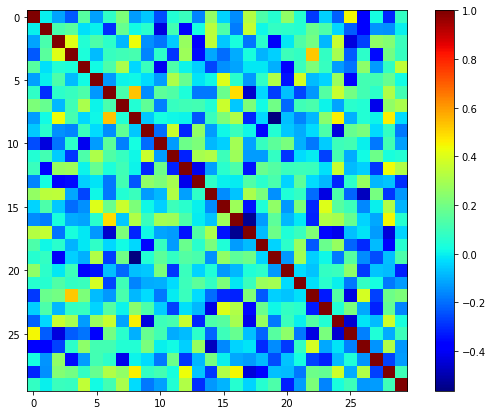

In [15]:
plt.figure(figsize=(10,7))
plt.imshow(correlation_matrix, cmap='jet')
plt.colorbar()
plt.show()

We also can minimize using `scipy` module `opt.minimize`. This could be hand if the system is non linear:

In [16]:
from scipy.optimize import minimize

In [17]:
# Define the function we want to minimize:
def chisqfunc(params):
    a,b = params
    chisq = np.dot(data[-1] - a*t_ - b, np.dot(inv_cov_d, data[-1] - a*t_ - b))
    return chisq

# Initial guess:
x0 = [0,0]

result = minimize(chisqfunc, x0)
print(result)

      fun: 34.459090452691605
 hess_inv: array([[ 0.00024069, -0.00476245],
       [-0.00476245,  0.11481557]])
      jac: array([-4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.46651098, 15.29751934])


In [18]:
print(np.array(result.x)) # Using python minimize function...
print([a,b]) # Analytical value...
print([a_,b_]) # Only diagonal of covariance matrix...

[ 0.46651098 15.29751934]
[0.4665110258043838, 15.297518471373646]
[0.5080037609957122, 13.826004347063801]
